# 🧠 Forezia Forecasting Notebook
This notebook processes a Shopify orders CSV and generates SKU-level forecasts.

In [1]:
# Step 1: Load the CSV
import pandas as pd

# Adjust the path if needed
file_path = 'orders_export.csv'
df = pd.read_csv(file_path)
df.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#1001,NaN,paid,2025-05-11 09:55:16 -0400,fulfilled,2025-05-11 09:57:05 -0400,no,EUR,1659.95,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,rZcE2A8z2PsX5lSwvlVnslhPs,NaN,NaN,rZcE2A8z2PsX5lSwvlVnslhPs
1,#1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#1002,NaN,paid,2025-05-11 09:56:23 -0400,fulfilled,2025-05-11 09:56:57 -0400,no,EUR,1615.90,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,rroDRkhlMQI1NK5MjSz6wn2j6,NaN,NaN,rroDRkhlMQI1NK5MjSz6wn2j6


In [2]:
# Step 2: Prepare the dataset
df['Created at'] = pd.to_datetime(df['Created at'])
df['date'] = df['Created at'].dt.date
df['product_id'] = df['Lineitem sku'].fillna(df['Lineitem name'])

sku_daily = df.groupby(['product_id', 'date'])['Lineitem quantity'].sum().reset_index()
sku_daily.head()

,product_id,date,Lineitem quantity
0,Gift Card - $10,2025-05-11,1
1,Gift Card - $10,2025-05-12,1
2,Gift Card - $10,2025-05-13,3
3,Gift Card - $10,2025-05-17,2
4,Gift Card - $100,2025-05-13,2


In [7]:
# Step 3: Select a top-selling SKU to forecast
top_sku = sku_daily['product_id'].value_counts().index[0]
sku_df = sku_daily[sku_daily['product_id'] == top_sku].copy()
sku_df.columns = ['product_id', 'ds', 'y']
sku_df = sku_df[['product_id', 'ds', 'y']]
sku_df.head()

,product_id,ds,y
10,Selling Plans Ski Wax - Selling Plans Ski Wax,2025-05-11,1
11,Selling Plans Ski Wax - Selling Plans Ski Wax,2025-05-12,1
12,Selling Plans Ski Wax - Selling Plans Ski Wax,2025-05-13,1
13,Selling Plans Ski Wax - Selling Plans Ski Wax,2025-05-16,1
14,Selling Plans Ski Wax - Selling Plans Ski Wax,2025-05-17,1


In [8]:
# save the sku_df in a CSV file
sku_df.to_csv('top_sku_daily_sales.csv', index=False)


/Users/luis.guimaraes/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


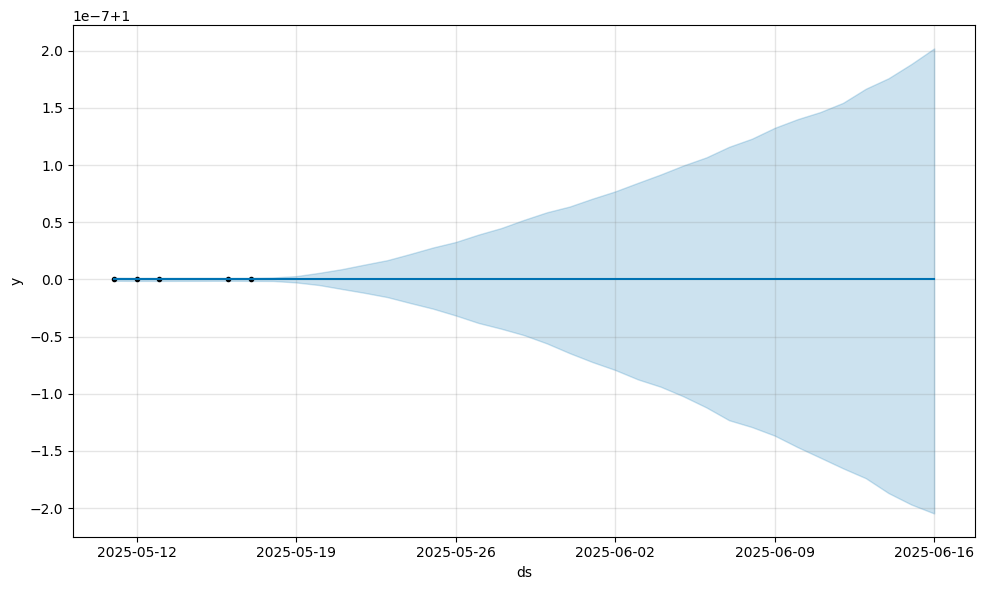

In [4]:
# Step 4: Forecast using Prophet
# %pip install prophet
from prophet import Prophet

model = Prophet()
model.add_country_holidays(country_name='UnitedStates')  # Placeholder
model.fit(sku_df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

fig = model.plot(forecast)

In [5]:
# Step 5: Evaluate confidence (placeholder)
# from modules.forecast_confidence import score_forecast
# confidence = score_forecast(sku_df)
# print("Forecast confidence:", confidence)